In [1]:
# 1) load dataset

from datasets import load_dataset

dataset = load_dataset("Babelscape/multinerd")

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

In [3]:
print(dataset)
print()
print(dataset["train"].features["ner_tags"].feature)

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags', 'lang'],
        num_rows: 2678400
    })
    validation: Dataset({
        features: ['tokens', 'ner_tags', 'lang'],
        num_rows: 334800
    })
    test: Dataset({
        features: ['tokens', 'ner_tags', 'lang'],
        num_rows: 335986
    })
})

Value(dtype='int64', id=None)


In [4]:
# filter out the english part for all splits
dataset_train_en = dataset["train"].filter(lambda example: example["lang"] == "en")
dataset_val_en = dataset["validation"].filter(lambda example: example["lang"] == "en")
dataset_test_en = dataset["test"].filter(lambda example: example["lang"] == "en")

In [5]:
set(dataset_train_en["lang"])

{'en'}

In [6]:
# get som stats
import matplotlib.pyplot as plt
from collections import Counter

def flatten_comprehension(list_of_lists):
    return [item for lst in list_of_lists for item in lst]

full_tagset = {
    "O": 0,
    "B-PER": 1,
    "I-PER": 2,
    "B-ORG": 3,
    "I-ORG": 4,
    "B-LOC": 5,
    "I-LOC": 6,
    "B-ANIM": 7,
    "I-ANIM": 8,
    "B-BIO": 9,
    "I-BIO": 10,
    "B-CEL": 11,
    "I-CEL": 12,
    "B-DIS": 13,
    "I-DIS": 14,
    "B-EVE": 15,
    "I-EVE": 16,
    "B-FOOD": 17,
    "I-FOOD": 18,
    "B-INST": 19,
    "I-INST": 20,
    "B-MEDIA": 21,
    "I-MEDIA": 22,
    "B-MYTH": 23,
    "I-MYTH": 24,
    "B-PLANT": 25,
    "I-PLANT": 26,
    "B-TIME": 27,
    "I-TIME": 28,
    "B-VEHI": 29,
    "I-VEHI": 30,
  }

all_ner_tags_train = flatten_comprehension(dataset_train_en["ner_tags"])
all_ner_tags_validation = flatten_comprehension(dataset_val_en["ner_tags"])
all_ner_tags_test = flatten_comprehension(dataset_test_en["ner_tags"])

counts_ner_train = Counter(all_ner_tags_train)
counts_ner_val = Counter(all_ner_tags_validation)
counts_ner_test = Counter(all_ner_tags_test)

count_dict_train = dict.fromkeys(full_tagset.keys(), 0)
count_dict_val = dict.fromkeys(full_tagset.keys(), 0)
count_dict_test = dict.fromkeys(full_tagset.keys(), 0)

#id2label = dict.fromkeys(label2id.values(), '')

for k,v in full_tagset.items():
  #id2label[v] = k
    count_dict_train[k] = counts_ner_train[v]
    count_dict_val[k] = counts_ner_val[v]
    count_dict_test[k] = counts_ner_test[v]


print("Counts train dataset:\n")
print(count_dict_train)
print("\nCounts validation dataset:\n")
print(count_dict_val)
print("\nCounts test dataset:\n")
print(count_dict_test)

Counts train dataset:

{'O': 4957198, 'B-PER': 125974, 'I-PER': 132376, 'B-ORG': 55282, 'I-ORG': 71998, 'B-LOC': 117330, 'I-LOC': 48800, 'B-ANIM': 25472, 'I-ANIM': 10614, 'B-BIO': 280, 'I-BIO': 70, 'B-CEL': 5370, 'I-CEL': 2972, 'B-DIS': 17404, 'I-DIS': 11608, 'B-EVE': 5050, 'I-EVE': 8406, 'B-FOOD': 16558, 'I-FOOD': 6060, 'B-INST': 758, 'I-INST': 726, 'B-MEDIA': 12162, 'I-MEDIA': 20070, 'B-MYTH': 1138, 'I-MYTH': 202, 'B-PLANT': 14872, 'I-PLANT': 4702, 'B-TIME': 5080, 'I-TIME': 3942, 'B-VEHI': 808, 'I-VEHI': 956}

Counts validation dataset:

{'O': 664072, 'B-PER': 15014, 'I-PER': 15984, 'B-ORG': 5474, 'I-ORG': 7824, 'B-LOC': 15700, 'I-LOC': 7234, 'B-ANIM': 2268, 'I-ANIM': 1154, 'B-BIO': 28, 'I-BIO': 8, 'B-CEL': 188, 'I-CEL': 38, 'B-DIS': 3390, 'I-DIS': 2502, 'B-EVE': 598, 'I-EVE': 1076, 'B-FOOD': 4240, 'I-FOOD': 1656, 'B-INST': 68, 'I-INST': 44, 'B-MEDIA': 1838, 'I-MEDIA': 2818, 'B-MYTH': 112, 'I-MYTH': 18, 'B-PLANT': 2360, 'I-PLANT': 830, 'B-TIME': 644, 'I-TIME': 508, 'B-VEHI': 160, 'I-

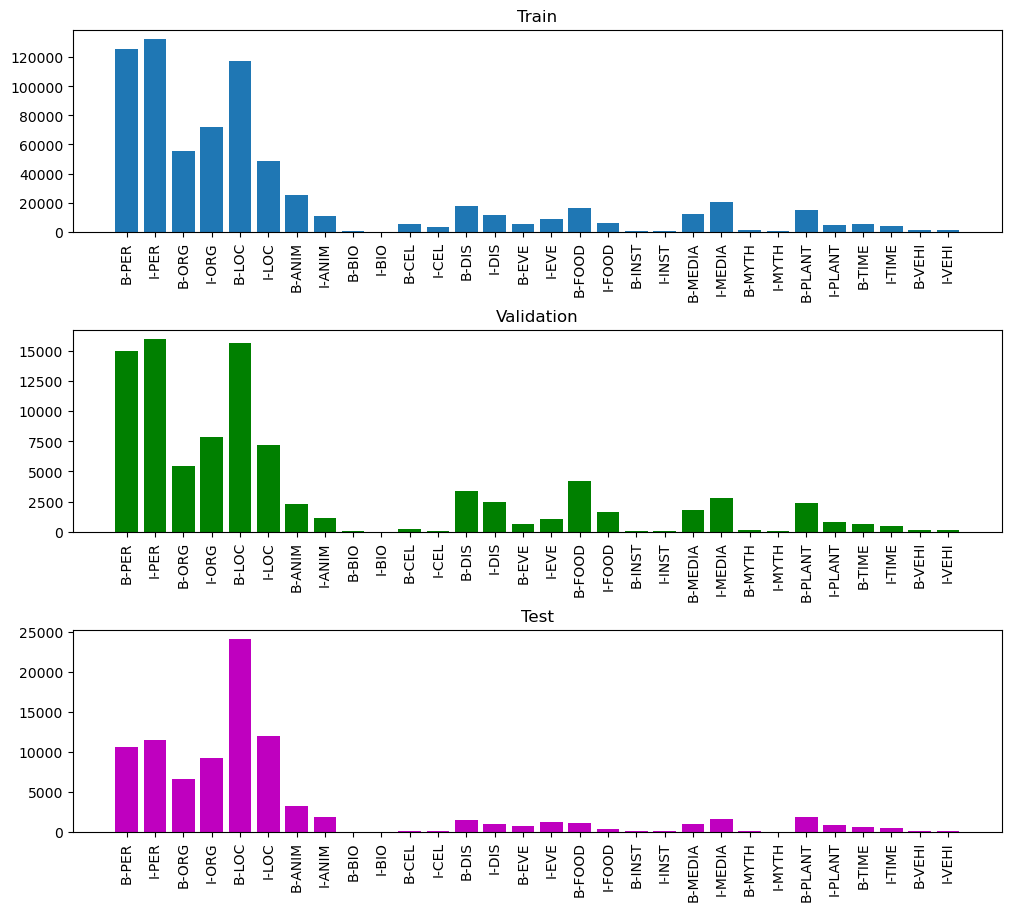

In [7]:
# visualize named entities in dataset splits

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(10, 9))

# drop O-label, since not a named entity

axs[0].bar(list(count_dict_train.keys())[1:], list(count_dict_train.values())[1:])
axs[0].set_title("Train")
axs[0].tick_params('x', labelrotation=90)
axs[1].bar(list(count_dict_val.keys())[1:], list(count_dict_val.values())[1:], color="g")
axs[1].set_title("Validation")
axs[1].tick_params('x', labelrotation=90)
axs[2].bar(list(count_dict_test.keys())[1:], list(count_dict_test.values())[1:], color="m")
axs[2].set_title("Test")
axs[2].tick_params('x', labelrotation=90)

Max length: 237
Min length: 2
Average length: 21.6492915904936
Standard deviation: 10.93943705198328


Text(0.5, 1.0, 'Histogram over lengths')

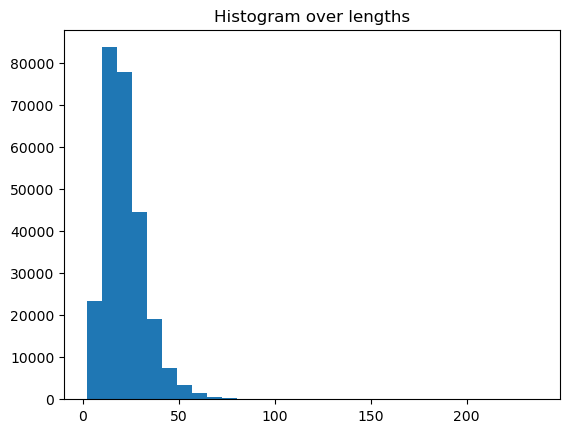

In [9]:
# some stats
import numpy as np

lengths = [len(list_tokens) for list_tokens in dataset_train_en["tokens"]]

print("Max length:", np.max(lengths))
print("Min length:", np.min(lengths))
print("Average length:", np.mean(lengths))
print("Standard deviation:",  np.std(lengths))

plt.hist(lengths, bins=30)
plt.title("Histogram over lengths")